# Procesamiento digital de imágenes

# Práctica operadores puntuales e histogramas

### Importo Librerias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg

### Importo imagenes

In [3]:
imgToTest = imageio.imread('img/lena.png')
imgAerial = imageio.imread('img/aerial.jpg')

# Ejercicio 1

In [8]:
def calcNivelesGrises(img):
    return np.iinfo(img.dtype).max+1

In [5]:
def compresionRangoDinamicoGrises(img):
    #ENTRADA: recibe una imagen
    #SALIDA: devuelve la imagen con el rango de grises comprimido
    
    maxV = calcNivelesGrises(img)-1

    c = 255/math.log(maxV+1)
    f = lambda v : c * math.log(v+1)

    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = f(imgCopy[x][y])
    return imgCopy
    

In [4]:
print(imgToTest)
print("----------")
print(compresionRangoDinamicoGrises(imgToTest))

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]
----------
[[234 234 234 ... 236 232 223]
 [234 234 234 ... 236 232 223]
 [234 234 234 ... 236 232 223]
 ...
 [174 174 180 ... 214 212 211]
 [175 175 185 ... 214 214 215]
 [175 175 185 ... 214 214 215]]


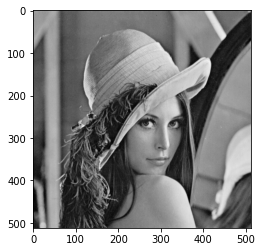

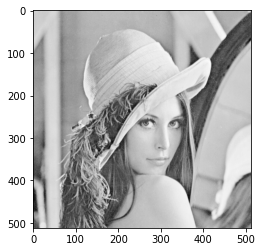

In [5]:
plt.imshow(imgToTest, cmap='gray')
plt.show()
plt.imshow(compresionRangoDinamicoGrises(imgToTest), cmap='gray')
plt.show()

# Ejercicio 2

In [11]:
def negativoDeImagen(img):
    #ENTRADA: recibe una imagen y la cantidad de niveles de grises
    #SALIDA: devuelve la imagen con el rango de grises comprimido

    L = util.calcNivelesGrises(img)
    f = lambda v : -v + L - 1

    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = f(imgCopy[x][y])

    return imgCopy
    

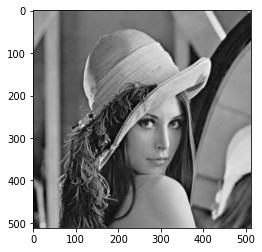

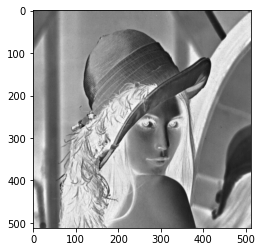

In [16]:
plt.imshow(imgToTest, cmap='gray')
plt.show()
plt.imshow(negativoDeImagen(imgToTest), cmap='gray')
plt.show()

# Ejercicio 3

In [20]:
def plotHist(img):
    L = calcNivelesGrises(img)
    
    #FORMA MANUAL:
    #amountPixels = len(img)*len(img[0])
    #values = L*[0]
    #for x in range(len(img)):
    #    for y in range(len(img[0])):
    #        values[img[x][y]]+=1
    #plt.bar(x=[x for x in range(256)],height=np.array(values)/amountPixels)

    #FORMA RAPIDA
    plt.hist(np.reshape(img,-1), bins=L, density=True)
    plt.show()

def plotHistCumulative(img):
    L = calcNivelesGrises(img)
    plt.hist(np.reshape(img,-1), bins=L, density=True, cumulative=True)
    plt.show()

    

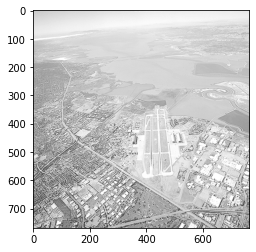

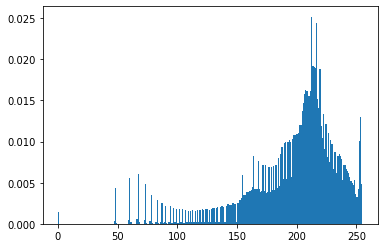

In [51]:
plt.imshow(imgAerial, cmap='gray')
plt.show()
plotHist(imgToTest)

# Ejercicio 4

In [86]:
def f2(v1X,v1Y,v2X,v2Y,v):
    pte = abs((v1Y-v2Y)/(v1X-v2X))
    b = v1Y - pte * v1X
    return pte * v + b

def f(v, L):
    r1, r2 = L/4, L*3/4
    s1, s2 = r1/2, r2
    f1, f3 = lambda v: v/2, lambda v: v*2
    #Tenemos que calcular las pendientes
    if v < r1:
        return f1(v)
    elif v < r2:
        return f2(r1, f1(r1), r2, f3(r2), v)
    else: 
        return f3(v)
    
def aumentoContraste(img):
    L = util.calcNivelesGrises(img)
    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            imgCopy[x][y] = int(f(img[x][y],L))
    return imgCopy

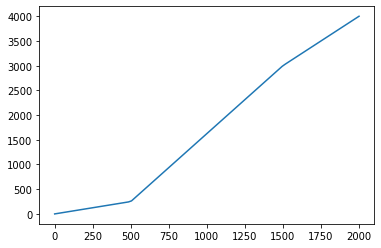

In [87]:
x = np.linspace(0,2000,100)
y = list(map(lambda z : f(z,2000), x))
plt.plot(x,y)
plt.show()

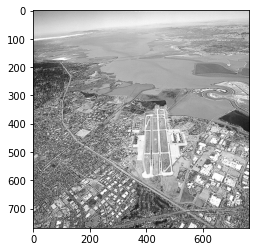

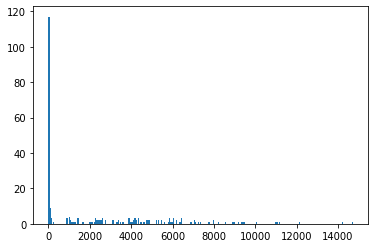

In [88]:
img2 = aumentoContraste(imgAerial)
plt.imshow(img2, cmap='gray')
plt.show()
plotHist(img2)

# Ejercicio 5

In [3]:
def umbral(img, threshold=None):
    L = calcNivelesGrises(img)
    if threshold == None:
        threshold = (L-1)/2
    imgCopy = copy.deepcopy(img)
    for x in range(len(img)):
        for y in range(len(img[0])):
            if(img[x][y] > threshold):
                imgCopy[x][y] = 1
            else: 
                imgCopy[x][y] = 0
    return imgCopy
    

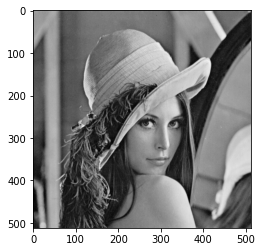

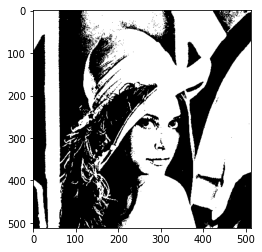

In [10]:
plt.imshow(imgToTest, cmap='gray')
plt.show()
plt.imshow(umbral(imgToTest), cmap='gray')
plt.show()

# Ejercicio 6

In [57]:
def getProbabilities(img):
    L = calcNivelesGrises(img)
    amountPixels = len(img)*len(img[0])
    values = L*[0]
    for x in range(len(img)):
        for y in range(len(img[0])):
            values[img[x][y]]+=1
    return np.array(values)/amountPixels

def get_mapping_histogram_ecualizacion(img, acumuladaEsperada=None):
    if(acumuladaEsperada == None):
        step = 1/256
        acumuladaEsperada = 256*[0]
        acumuladaEsperada[255] = 1
        for i in range(1,255):
            acumuladaEsperada[i] = acumuladaEsperada[i-1]+step
    
    amountPixels = len(img)*len(img[0])
    
    p = getProbabilities(img)
    acumuladaProbabilidades = copy.deepcopy(p)
    for i in range(1,len(acumuladaProbabilidades)):
        acumuladaProbabilidades[i] = acumuladaProbabilidades[i-1]+acumuladaProbabilidades[i]

    index1 = 0
    index2 = 0
    T = [0]*256

    while(index1 < 256):
        if(acumuladaProbabilidades[index1] < acumuladaEsperada[index2]):
            index1 += 1
        else:
            T[index2] = index1
            index2 += 1

    print(T)

    #for i in range(len(T)):
    #    T[i] = math.floor(T[i]*(256-1)+0.5) 
    return T
    

In [50]:
def applyTransformation(img, T):
    imgCopy = copy.deepcopy(img)
    for i in range(len(img)):
        for j in range(len(img[0])):
            imgCopy[i][j] = T[img[i][j]]
    return imgCopy

In [58]:
#plt.imshow(imgAerial, cmap='gray')
#plt.show()

#plotHist(imgAerial)
#plotHistCumulative(imgAerial)

T = get_mapping_histogram_ecualizacion(imgAerial)
imgHE = applyTransformation(imgAerial, T)

#plt.imshow(imgHE, cmap='gray')
#plt.show()

#plotHist(imgHE)
#plotHistCumulative(imgHE)


[0, 48, 60, 60, 67, 72, 73, 78, 83, 90, 94, 99, 104, 109, 114, 119, 122, 125, 129, 131, 134, 137, 138, 141, 143, 145, 146, 148, 149, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 168, 169, 170, 171, 172, 172, 173, 174, 174, 175, 176, 177, 177, 178, 179, 180, 180, 181, 182, 183, 183, 184, 185, 185, 186, 187, 187, 187, 188, 188, 189, 190, 190, 190, 191, 191, 192, 192, 193, 193, 194, 194, 194, 195, 195, 196, 196, 197, 197, 197, 198, 198, 199, 199, 199, 200, 200, 200, 201, 201, 201, 202, 202, 203, 203, 203, 203, 204, 204, 204, 205, 205, 205, 206, 206, 206, 206, 207, 207, 207, 207, 208, 208, 208, 208, 209, 209, 209, 209, 210, 210, 210, 210, 211, 211, 211, 211, 212, 212, 212, 212, 213, 213, 213, 213, 213, 213, 213, 214, 214, 214, 214, 215, 215, 215, 215, 215, 216, 216, 216, 216, 216, 217, 217, 217, 217, 217, 217, 218, 218, 218, 218, 219, 219, 219, 219, 220, 220, 220, 220, 220, 221, 221, 221, 222, 222, 223, 223, 223, 223, 224, 224, 225, 225, 225, 22

# Ejercicio 7

In [64]:
def getModifiedHistogram(hist, lamb=0, gamma=0):
    D = np.zeros((255, 256))
    for i in range(255):
        D[i][i] = -1
        D[i][i+1] = 1

    u = L*[1/L]
    I = np.identity(256)
    return linalg.inv((1+lamb)*I + gamma*D.T*D)*(hist+lamb*u)
    